# Project Name- Heart Failure Prediction


## problem statement-

#### Project Description:
You already know the world is pacing with such a brisk pace and so do the diseases, and to cure the diseases, doctors have to devote their precious time and experience that they had. But what is more concerning is the increasing number of patients than ever before, which results in more doctors and manual work. Instead of doing that, wouldn't it be awesome if we have a model which can predict whether a patient is going to have or has a particular disease or not ? That’s what we are talking about here.
The aim of this model is to predict whether a patient is going to have a heart failure or not based on certain input features. After that, we’re going to evaluate and find out how well our model is working.
The dataset includes different parameters which are helpful to cut down the chase and helps us to know the target variable.


#### Importing Lybraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [17]:
data=pd.read_csv('data.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [18]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


#### Total number of Rows and Columns in dataset

In [19]:
data.shape

(299, 13)

#### Total Columns

In [20]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

#### Checking Missing values

In [21]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Statistical Description of the dataset

In [22]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [23]:
data['age'].min()

40.0

In [24]:
range=data['age'].max()-data['age'].min()


In [25]:
range

55.0

#### Countplot of DEATH_EVENT

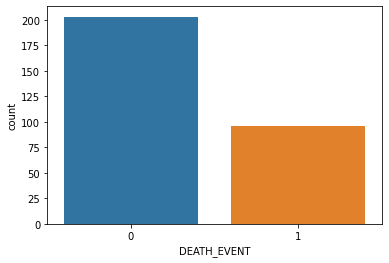

In [26]:
sns.countplot(x='DEATH_EVENT',data=data)
plt.show()

In [27]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

#### Find the coeficcient between different feature

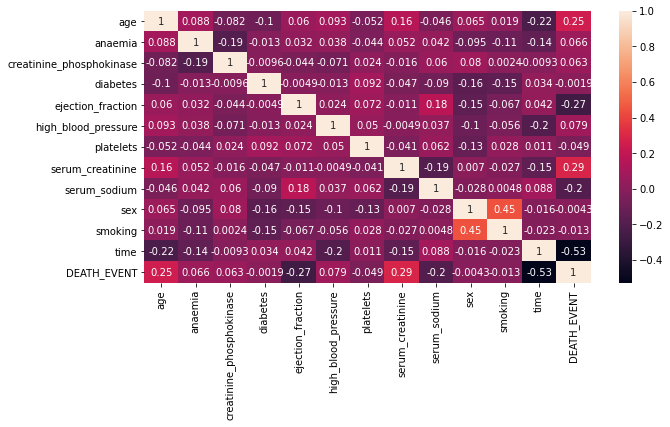

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Feature Importances

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

[0.09271086 0.0270331  0.07855351 0.03057345 0.12046299 0.02225932
 0.06691945 0.11755671 0.08364825 0.02494273 0.03012897 0.30521067]


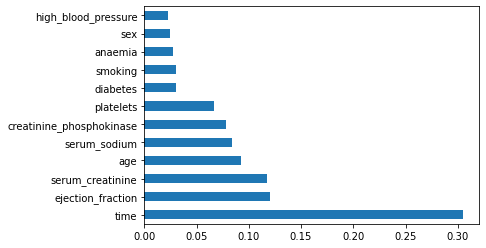

In [33]:
X=data.drop(columns='DEATH_EVENT')
y=data['DEATH_EVENT']
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_impor=pd.Series(model.feature_importances_ ,index=X. columns)
feat_impor.nlargest(12).plot(kind='barh')
plt.show()

In [34]:
feat_impor*100

age                          9.271086
anaemia                      2.703310
creatinine_phosphokinase     7.855351
diabetes                     3.057345
ejection_fraction           12.046299
high_blood_pressure          2.225932
platelets                    6.691945
serum_creatinine            11.755671
serum_sodium                 8.364825
sex                          2.494273
smoking                      3.012897
time                        30.521067
dtype: float64

In [35]:
sum(feat_impor.nlargest(6))

0.7981429827503946

#### Splitting the data and Feature Scalling

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
X=data.iloc[:,[0,2,4,7,8,11]]
y=data[['DEATH_EVENT']]

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=(0.25),random_state=0)

In [48]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [50]:
print("X_train shape=",X_train.shape)
print("X_test shape=",X_test.shape)
print("y_train shape",y_test.shape)
print("y_test shape",y_test.shape)

X_train shape= (224, 6)
X_test shape= (75, 6)
y_train shape (75, 1)
y_test shape (75, 1)


#### Building a model and evaluating It

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix
from sklearn.metrics import r2_score,roc_auc_score,roc_curve,classification_report

In [58]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print('Accuracy Score:{:.4f}'.format(accuracy_score(y_test,y_pred)))
print('Decision Tree Classifier f1-score :{:4f}'.format(f1_score(y_test,y_pred)))
print('Decision Tree Classifier prediction :{:.4f}'.format(precision_score(y_test,y_pred)))
print('Decision Tree Classifier recall :{:.4f}'.format(recall_score(y_test,y_pred)))
print('Decision Tree Classifier roc auc score :{:.4f}'.format(roc_auc_score(y_test,y_pred)))
print('\n',classification_report(y_pred,y_test))

Accuracy Score:0.8000
Decision Tree Classifier f1-score :0.680851
Decision Tree Classifier prediction :0.8000
Decision Tree Classifier recall :0.5926
Decision Tree Classifier roc auc score :0.7546

               precision    recall  f1-score   support

           0       0.92      0.80      0.85        55
           1       0.59      0.80      0.68        20

    accuracy                           0.80        75
   macro avg       0.75      0.80      0.77        75
weighted avg       0.83      0.80      0.81        75



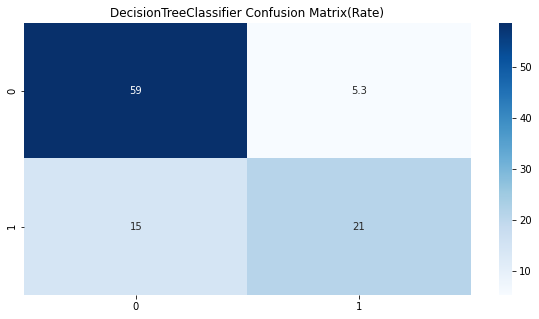

In [63]:
plt.figure(figsize=(10,5))
matrix=confusion_matrix(y_test,y_pred)
sns.heatmap((matrix/np.sum(matrix)* 100),annot=True,cmap='Blues')
plt.title('DecisionTreeClassifier Confusion Matrix(Rate)')
plt.show()

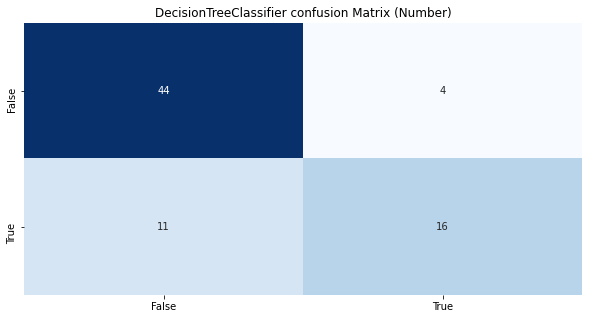

In [65]:
con_matri=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(con_matri,annot=True,cmap='Blues',xticklabels=['False','True'],yticklabels=['False','True'],cbar=False)
plt.title('DecisionTreeClassifier confusion Matrix (Number)')
plt.show()

#### Hyperparameter tuning using GridsearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

In [70]:
para_grid={'max_depth':np.arange(1,10),
          'min_samples_split':[0.001,0.01,0.1,0.2,0.02,0.002],
          'criterion':['gini','entropy',None],
          'max_leaf_nodes':np.arange(1,10),
          'class_weight':['balanced',None]
}
clf_2=DecisionTreeClassifier()
grid=GridSearchCV(clf_2,para_grid,n_jobs=-1,verbose=2,cv=10)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 10 folds for each of 2916 candidates, totalling 29160 fits


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_split': 0.001}

#### Implementing the Hyperparameters

In [73]:
claf=DecisionTreeClassifier(class_weight='balanced',
                            criterion='gini',
                            max_depth=1,
                           max_leaf_nodes=2,
                           min_samples_split=0.001,
                           random_state=0
)
claf.fit(X_train,y_train)
y_pred=claf.predict(X_test)

print('Accuracy Score:{:.4f}'.format(accuracy_score(y_test,y_pred)))
print('Decision Tree Classifier f1-score :{:4f}'.format(f1_score(y_test,y_pred)))
print('Decision Tree Classifier prediction :{:.4f}'.format(precision_score(y_test,y_pred)))
print('Decision Tree Classifier recall :{:.4f}'.format(recall_score(y_test,y_pred)))
print('Decision Tree Classifier roc auc score :{:.4f}'.format(roc_auc_score(y_test,y_pred)))
print('\n',classification_report(y_pred,y_test))

Accuracy Score:0.8267
Decision Tree Classifier f1-score :0.723404
Decision Tree Classifier prediction :0.8500
Decision Tree Classifier recall :0.6296
Decision Tree Classifier roc auc score :0.7836

               precision    recall  f1-score   support

           0       0.94      0.82      0.87        55
           1       0.63      0.85      0.72        20

    accuracy                           0.83        75
   macro avg       0.78      0.83      0.80        75
weighted avg       0.86      0.83      0.83        75



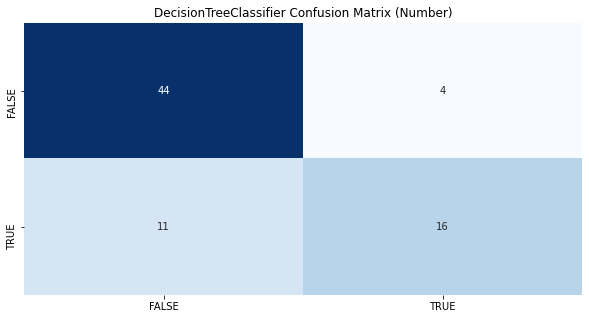

In [77]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix,annot=True,cmap='Blues',
           xticklabels=['FALSE','TRUE'],
           yticklabels=['FALSE','TRUE'],
           cbar=False)
plt.title('DecisionTreeClassifier Confusion Matrix (Number)')
plt.show()

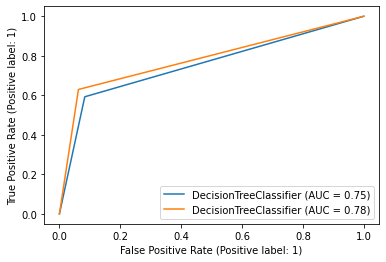

In [80]:
from sklearn.metrics import plot_roc_curve
fig=plot_roc_curve(clf,X_test,y_test)
fig=plot_roc_curve(claf,X_test,y_test,ax=fig.ax_)
plt.show()